# <center> Book Recommendations System - EDA</center>
#### <center>**By: Mili Ketan Thakrar**</center>

<a id="TOC"></a> <br>
## Table of Contents
1. [Introduction](#intro)
2. [Importing Libraries](#import)
3. [Defining Functions](#def)
4. [Loading the Dataset](#loading)
5. [Data Dictionary](#dict)
6. [Data Visualization](#visual)
    1. [Distribution of Average Book Ratings](#avg)
    2. [Comparing the distrubutions of the Ave ratings with and without zero](#compare)
    3. [Top 10 Countries by User Count and Age breakdown](#top10)
    4. [Distribution of Users Across Age Categories](#age)
    5. [Top 10 Books by Total Number of Ratings](#top)
    6. [Relationship Between Total Number of Ratings and Average Ratings](#scatter)
    7. [Distribution of Ratings Across Age Categories](#box-age)
    8. [Distribution of Ratings Across Publication Year Categories](#publish)
    9. [Correlation Heatmap of Book Metrics](#corr)
7. [Encoding Columns](#encode)
8. [Hypothesis Testing](#testing)
10. [Conclusion and Next Steps](#conclusion)

<a id="intro"></a>
## Introduction

A book recommendation system is an intelligent application designed to help users discover books tailored to their interests and reading preferences. By analyzing user behavior, ratings, and book attributes, the system provides personalized suggestions, enhancing the reading experience and making it easier to find engaging and relevant books. This project aims to develop an efficient recommendation engine using advanced algorithms and data analysis techniques.

In this notebook, we aim to explore and analyze a dataset related to book recommendations. The primary focus of this phase is conducting **Exploratory Data Analysis (EDA)**, where we will delve into the dataset to uncover patterns, trends, and insights. Through visualization techniques and statistical methods, we will better understand the relationships between different variables and their impact on review scores.

As part of the analysis, we will test the following hypotheses:

- **Null Hypothesis (H₀)**: Review scores (Ratings) are independent of other parameters such as Total Number of Ratings, Average Ratings, Publisher, etc.
- **Alternative Hypothesis (H₁)**: Review scores are dependent on other parameters.

By performing hypothesis testing and visualizing key metrics, we aim to validate or reject the null hypothesis. This will help us determine whether review scores are influenced by factors such as popularity, publisher reputation, or other attributes. The insights gained from this analysis will serve as a foundation for building effective book recommendation systems in later stages of the project.

<a id="import"></a>
## Importing Libraries 
[Back to Table of Contents](#TOC)

#### Required libraries

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

- **NumPy**: Provides a fast numerical array structure and helper functions.
- **Pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
- **Matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
- **Seaborn**: Advanced statistical plotting library.

In [8]:
# Import essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import statistical and mathematical tools
from scipy.stats import linregress, chi2_contingency
from scipy.stats import spearmanr

# Import libraries for machine learning and text processing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Import Natural Language Toolkit (NLTK) for text processing
import nltk
from nltk.corpus import stopwords

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Import custom utility functions from the data_utils module. Defined in an external Python file
from data_utils import (
    import_csv, 
    generate_data_dictionary, 
    define_df_settings  
)

<a id="loading"></a>
## Loading the Dataset
[Back to Table of Contents](#TOC)

In [5]:
# Loading the clean dataset 
df = import_csv('cleaned_data.csv')

Successfully imported data from cleaned_data.csv


In [6]:
df.head() 

,ISBN,Title,Author,Ratings,Total_num_of_ratings,Avg_ratings,Avg_ratings_excluding_zero,Publisher,Year_Category,Publication_year,User_id,Age_Category,City,State,Country,Image_URL
0,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,0,56,3.89,7.79,Health Communications,1980-1999,1998,8,26-32,timmins,ontario,canada,http://images.amazon.com/images/P/1558746218.0...
1,0002005018,Clara Callan,Richard Bruce Wright,5,14,4.93,7.67,HarperFlamingo Canada,2000-2009,2001,8,26-32,timmins,ontario,canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,0,3,5.00,7.50,HarperPerennial,1980-1999,1991,8,26-32,timmins,ontario,canada,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,0,11,4.27,7.83,Farrar Straus Giroux,1980-1999,1999,8,26-32,timmins,ontario,canada,http://images.amazon.com/images/P/0374157065.0...
4,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,7,3,4.67,7.00,River City Pub,1980-1999,1994,8,26-32,timmins,ontario,canada,http://images.amazon.com/images/P/1881320189.0...


<a id="dict"></a>
## Data Dictionary
[Back to Table of Contents](#TOC)

In [7]:
data_dict = generate_data_dictionary(df)
display(data_dict)

,Column Name,Data Type,Description,Unique Values,Missing Values,Value Range
0,ISBN,object,"International Standard Book Number, unique ide...",149831,0,N/A
1,Title,object,The title of the book,135563,0,N/A
2,Author,object,The name of the book's author,62110,0,N/A
3,Ratings,int64,"User's rating of the book, scale of 1-10",11,0,"(0, 10)"
4,Total_num_of_ratings,int64,Total number of ratings for the book,377,0,"(1, 2502)"
5,Avg_ratings,float64,Average rating score for the book,710,0,"(0.11, 10.0)"
6,Avg_ratings_excluding_zero,float64,Average rating score for the book excluding 0 ...,418,0,"(1.0, 10.0)"
7,Publisher,object,The name of the book's publisher,11573,0,N/A
8,Year_Category,object,Categorized time period of publication,7,0,N/A
9,Publication_year,int64,The year the book was published,100,0,"(0, 2020)"


<a id="visual"></a>
## Data Visualization
[Back to Table of Contents](#TOC)

<a id="Avg"></a>
#### Distribution of Average Book Ratings (including and excluding 0)

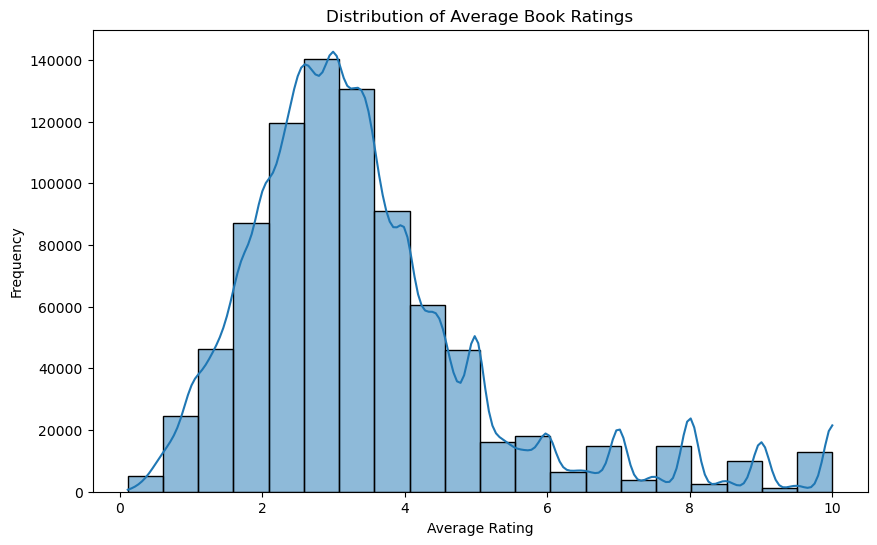

In [7]:
# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Avg_ratings', bins=20, kde=True)
plt.title('Distribution of Average Book Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

The graph highlights a substantial portion of users without any book ratings, confirming our previous analysis that showed a peak at zero ratings. However, when we exclude these non-raters, the distribution of average ratings appears **approximately normal, with a slight Right-skewed**. The distribution **peaks around an average rating of 2.5**, and we observe minor increases at the higher end of the scale, specifically around 7.5, 8.5, and 10. These upticks at the higher end suggest that while most active users provide moderate ratings, there's a notable segment that tends to rate books more favorably. This could indicate a preference for highly-rated books or a general tendency to give positive feedback when users are engaged enough to provide a rating.

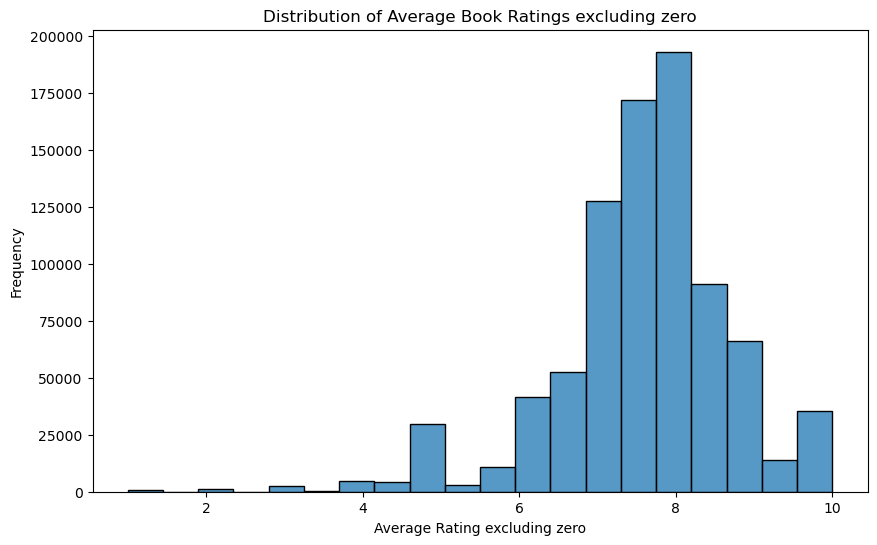

In [8]:
# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Avg_ratings_excluding_zero', bins=20)
plt.title('Distribution of Average Book Ratings excluding zero')
plt.xlabel('Average Rating excluding zero')
plt.ylabel('Frequency')
plt.show()

The graph showing the average ratings excluding zero values reveals a clear shift toward higher ratings. This is expected because the exclusion of zero ratings eliminates the skew caused by their abundance. Zero ratings were disproportionately affecting the dataset, pulling the average down toward lower values. By removing these zeros, we now see that most books in the dataset are rated highly, with the majority of ratings falling between 6 and 9. This adjustment provides a more accurate representation of the distribution of non-zero ratings and highlights the generally positive reception of the books.

<a id="compare"></a>
#### Comparing the distrubutions of the Ave ratings with and without zero

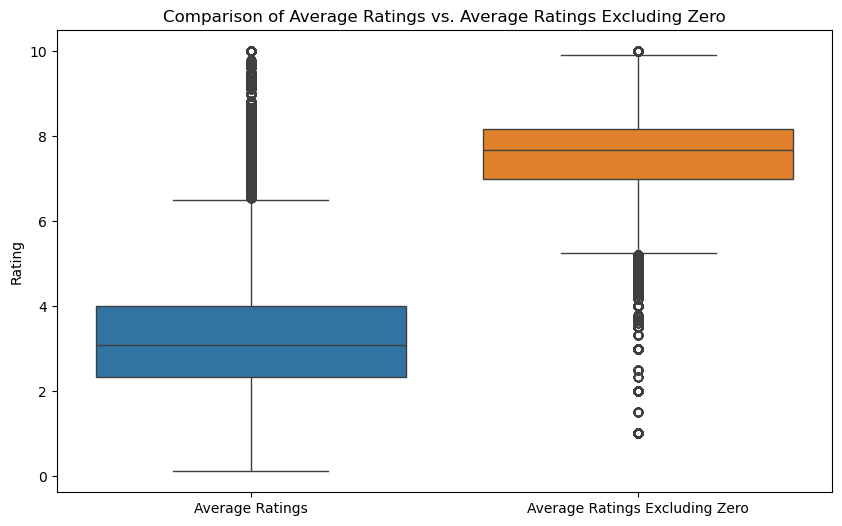

In [9]:
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(data=[df['Avg_ratings'], df['Avg_ratings_excluding_zero']])

# Set labels and title
plt.xticks([0, 1], ['Average Ratings', 'Average Ratings Excluding Zero'])
plt.ylabel('Rating')
plt.title('Comparison of Average Ratings vs. Average Ratings Excluding Zero')

# Show the plot
plt.show()

We are comparing the distribution of average ratings, both including and excluding zero values, using a box plot. The results clearly illustrate that zero ratings significantly pull the average toward lower values, creating a skewed distribution. When zero ratings are excluded, the average ratings shift upward, showing a stronger concentration toward higher values. This distinction highlights how zero ratings can distort the dataset and obscure the true trend of higher average ratings among non-zero-rated entries.

<a id="top10"></a>
#### Top 10 Countries by User Count and Age breakdown

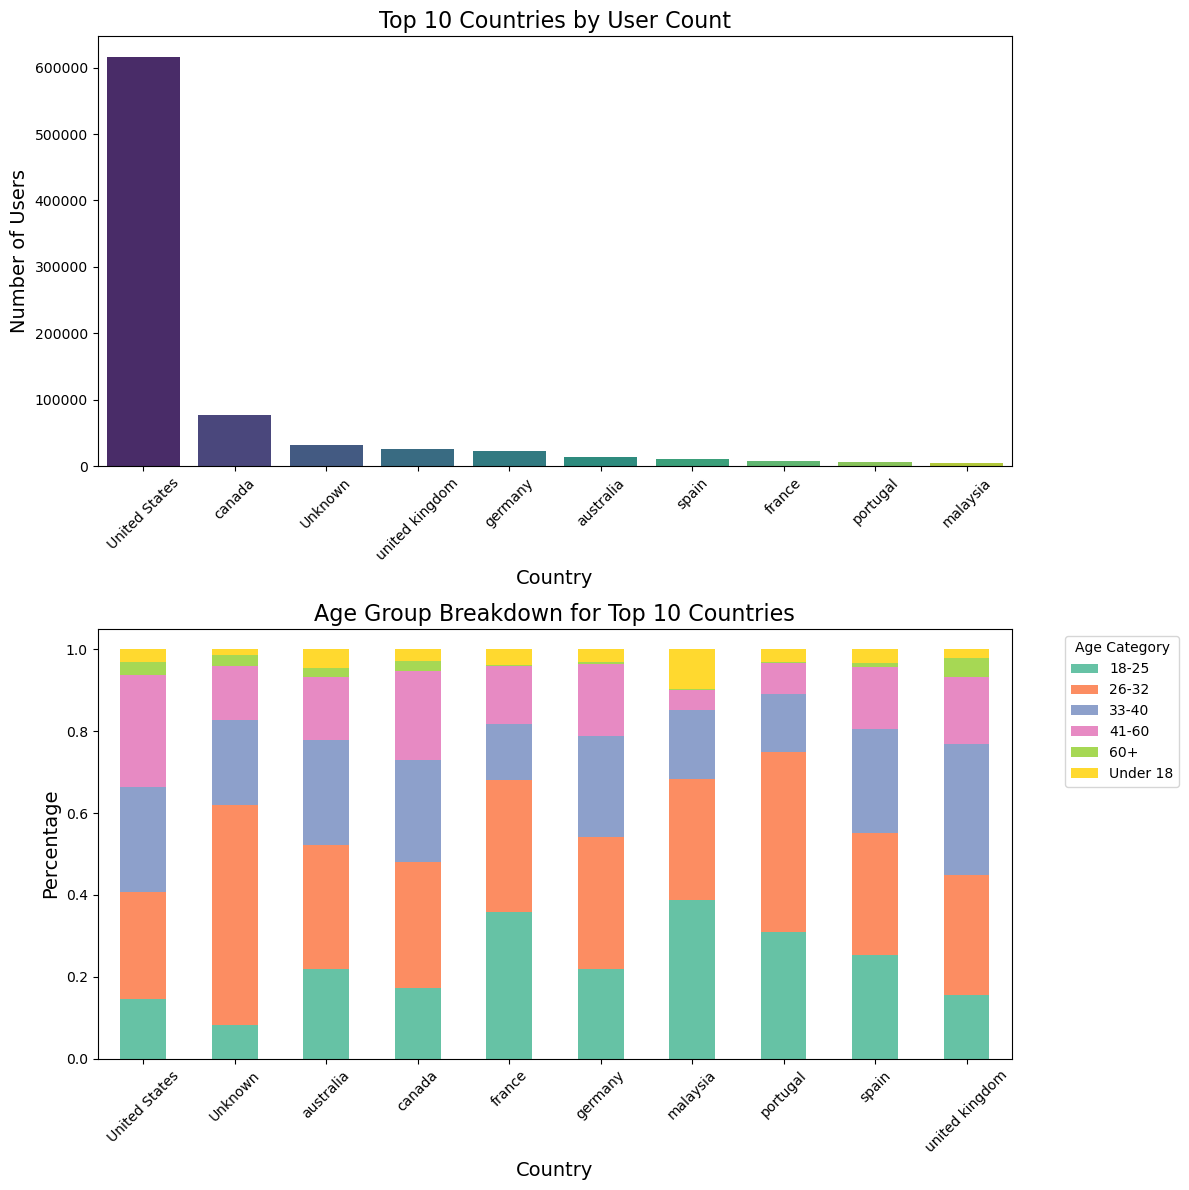

In [10]:
# Grouping the data by country and count users
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'User_Count']

# Getting the top 10 countries
top_10_countries = country_counts.head(10)

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Bar chart for top 10 countries
sns.barplot(
    x='Country', 
    y='User_Count', 
    data=top_10_countries, 
    ax=ax1, 
    hue='Country',
    palette='viridis',
    legend=False
)
ax1.set_title('Top 10 Countries by User Count', fontsize=16)
ax1.set_xlabel('Country', fontsize=14)
ax1.set_ylabel('Number of Users', fontsize=14)
ax1.tick_params(axis='x', rotation=45)

# Age group breakdown for top 10 countries
age_breakdown = (
    df[df['Country'].isin(top_10_countries['Country'])]
    .groupby(['Country', 'Age_Category'])
    .size()
    .unstack(fill_value=0)
)

# Calculate percentage breakdown
age_breakdown_percent = age_breakdown.div(age_breakdown.sum(axis=1), axis=0)

# Using a distinct color palette for age categories
colors = sns.color_palette("Set2", n_colors=len(age_breakdown_percent.columns))

# Plotting the stacked bar chart
age_breakdown_percent.plot(kind='bar', stacked=True, ax=ax2, color=colors)

ax2.set_title('Age Group Breakdown for Top 10 Countries', fontsize=16)
ax2.set_xlabel('Country', fontsize=14)
ax2.set_ylabel('Percentage', fontsize=14)
ax2.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The graph shows the top 10 countries where our users are from, providing insights into the geographical distribution of our user base. This information is crucial for developing an effective recommendation system and understanding potential biases in our data.

**Key Observations**

1. US Dominance: The United States has the highest number of users, significantly outpacing other countries.

2. Diverse User Base: Germany, France and Portugal are among the top countries, indicating a global user distribution.

3. Language Diversity: The presence of non-English speaking countries suggests a diverse linguistic user base.

4. Age Distribution: The US and Canada show fairly even distribution across age groups from 18-60, while countries like Portugal and New Zealand have higher percentages in the 18-32 age range.

5. Low Under-18 Representation: All countries show a very low percentage of users under 18.

**Implications for Recommendation System**

1. Global Customization: Tailor recommendations based on regional preferences and availability.

2. Language Considerations: Implement multi-language support to cater to diverse linguistic user groups.

3. Age-Based Recommendations: Adjust recommendations based on age distribution patterns in different countries.

4. Bias Mitigation: Use geographical awareness to ensure fair representation for users from all countries in the recommendation algorithm.

To improve the system, consider incorporating location-based filtering, implementing strategies for users with unknown locations, and exploring collaborative filtering techniques that account for geographical and age-based similarities.

<a id="Age"></a>
#### Distribution of Users Across Age Categories

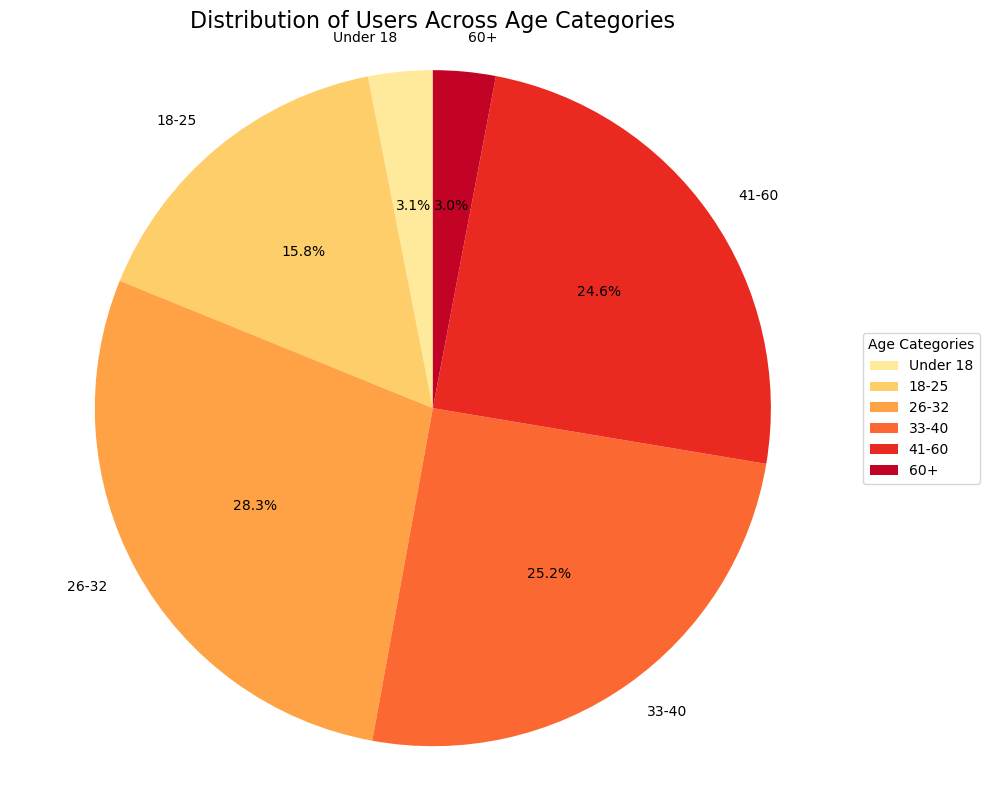

In [11]:
# Counting the number of users in each Age_Category
age_distribution = df['Age_Category'].value_counts()

# Defining the correct order of age categories
age_order = ['Under 18', '18-25', '26-32', '33-40', '41-60', '60+']

# Sorting the data according to this order
age_distribution = age_distribution.reindex(age_order)

# Defining a color palette
colors = sns.color_palette("YlOrRd", len(age_order))

# Creating a pie chart
plt.figure(figsize=(10, 8))
plt.pie(age_distribution.values, labels=age_distribution.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Users Across Age Categories', fontsize=16)
plt.axis('equal')

# Adding a legend
plt.legend(age_distribution.index, title="Age Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

The pie chart details the percentage of users in various age ranges, offering critical insights for optimizing our recommendation system. Understanding this distribution enables us to better cater to our user base and refine our recommendations accordingly. A key observation is the **balanced representation** among users aged 26-32, 33-40, and 41-60, indicating that these groups constitute the majority of our users. Additionally, the 15% of users in the 16-25 age range represent a significant **younger demographic** that warrants specific attention. It's also important to note the smaller percentages in the extreme age categories, which can be attributed to natural user demographics and data cleaning efforts aimed at removing unrealistic age entries, ensuring that we maintained the **integrity of the underlying data**.

These insights have several implications for our recommendation system:

*   **Core Audience Focus:** Tailor recommendations to suit the preferences of our core age groups (26-60).
*   **Youth Engagement:** Cater to the unique interests of our younger audience (16-25) through trending or youth-oriented content.
*   **Algorithm Design:** Develop algorithms that account for age-based preferences.
*   **Bias Mitigation:** Ensure diverse recommendations across all age groups to avoid age-based biases.

By leveraging this age distribution data, we can provide more personalized and relevant suggestions to users across all age ranges.

<a id="top"></a>
#### Top 10 Books by Total Number of Ratings

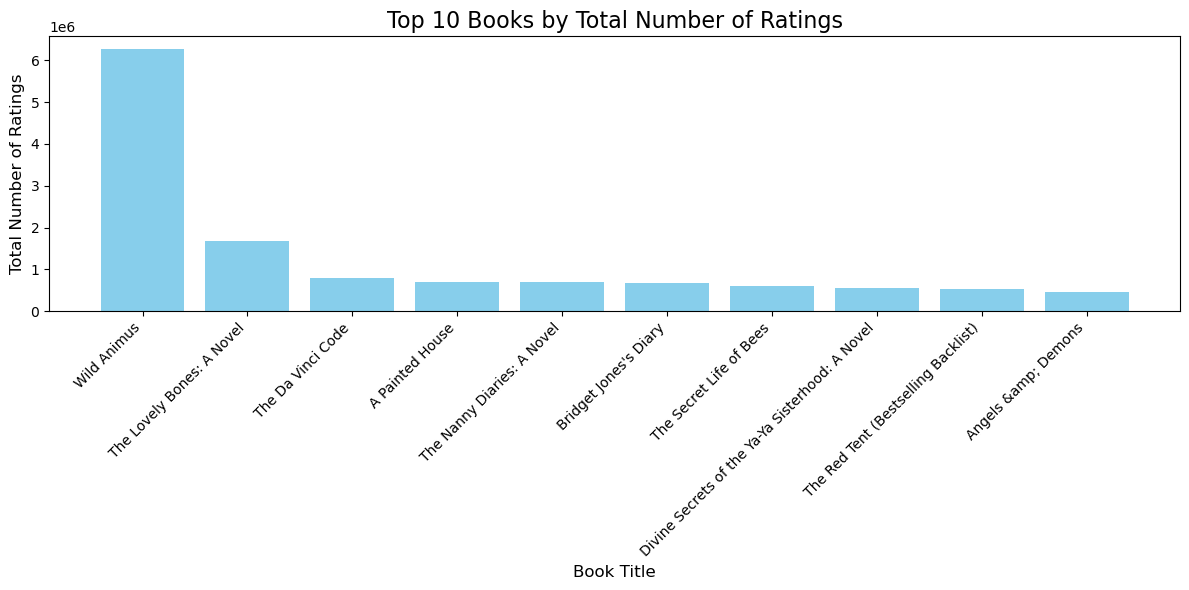

In [12]:
# Grouping by title and sum the total number of ratings
book_ratings = df.groupby('Title')['Total_num_of_ratings'].sum().reset_index()

# Sorting by total number of ratings in descending order and get top 5
top_5_books = book_ratings.sort_values('Total_num_of_ratings', ascending=False).head(10)

# Visualizing the results
plt.figure(figsize=(12, 6))
plt.bar(top_5_books['Title'], top_5_books['Total_num_of_ratings'], color='skyblue')
plt.title('Top 10 Books by Total Number of Ratings', fontsize=16)
plt.xlabel('Book Title', fontsize=12)
plt.ylabel('Total Number of Ratings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Analysis of Top 10 Books by Total Number of Ratings

The graph visualizes the **top 10 books with the highest total number of ratings**. From the chart, we observe that *Wild Animus* has the most ratings, followed by other notable titles like *The Da Vinci Code* and *Bridget Jones's Diary*. While these books appear to dominate based on sheer volume of ratings, this metric alone can be misleading.

##### Statistical Concerns
1. **No Weighting for Rating Volume**: A book with only a few ratings (e.g., 5 users giving 5 stars) can appear disproportionately high in average ratings compared to a book with thousands of ratings and a slightly lower average.
2. **Bias in Popularity**: Books with more exposure or marketing tend to accumulate more ratings, which may not necessarily reflect their quality.
3. **Skewed Perception**: Relying solely on total ratings does not account for variability or reliability in the data.

##### Proposed Solution
To address these issues, we plan to implement a **weighted rating system** in the next sprint. This will adjust each book’s score by incorporating:
- **Volume of Ratings**: Books with more ratings will carry more weight.
- **Smoothing Factor**: A method will be applied to reduce the impact of outliers (e.g., books rated highly by only a few users).

##### Future Steps
1. Implement a weighted scoring algorithm.
2. Reassess the rankings using both total ratings and weighted scores.

By introducing this system, we aim to provide a more accurate representation of highly rated books, balancing popularity with reliability.

<a id="scatter"></a>
#### Relationship Between Total Number of Ratings and Average Ratings

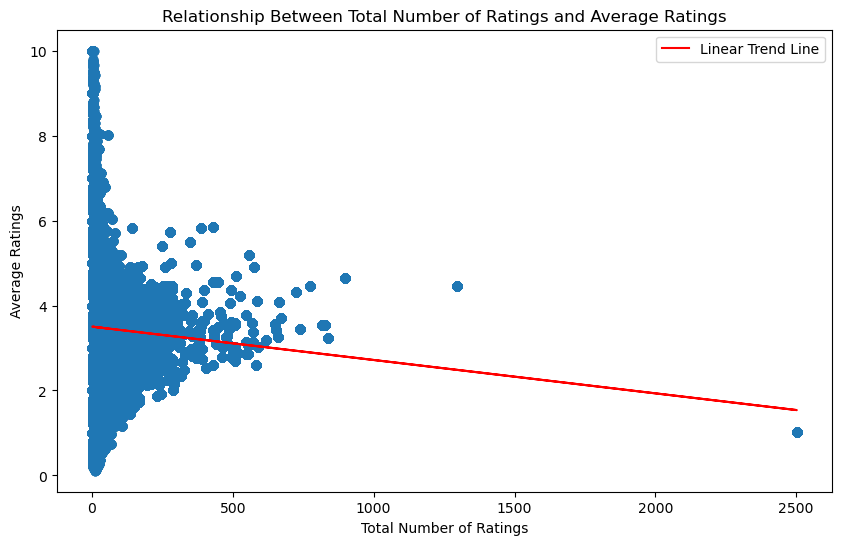

In [13]:
x = df['Total_num_of_ratings']
y = df['Avg_ratings']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

# Add trend line
slope, intercept, _, _, _ = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear Trend Line')

plt.xlabel('Total Number of Ratings')
plt.ylabel('Average Ratings')
plt.title('Relationship Between Total Number of Ratings and Average Ratings')
plt.legend()
plt.show()

This scatter plot highlights the relationship between the total number of ratings and the average ratings for a dataset of books. The red linear trend line indicates a negative correlation, suggesting that books with a higher total number of ratings tend to have slightly lower average ratings. Most data points are concentrated near the lower end of the x-axis, where books with fewer total ratings exhibit a broader range of average ratings, spanning from 0 to 10. However, as the total number of ratings increases, the average ratings appear to cluster and decline slightly. This trend may indicate that books with broader readerships attract more diverse opinions, leading to lower average ratings compared to books with fewer, potentially more favorable, ratings. Outliers with exceptionally high numbers of ratings and low averages further reinforce this observation.

<a id="box-age"></a>
#### Distribution of Ratings Across Age Categories

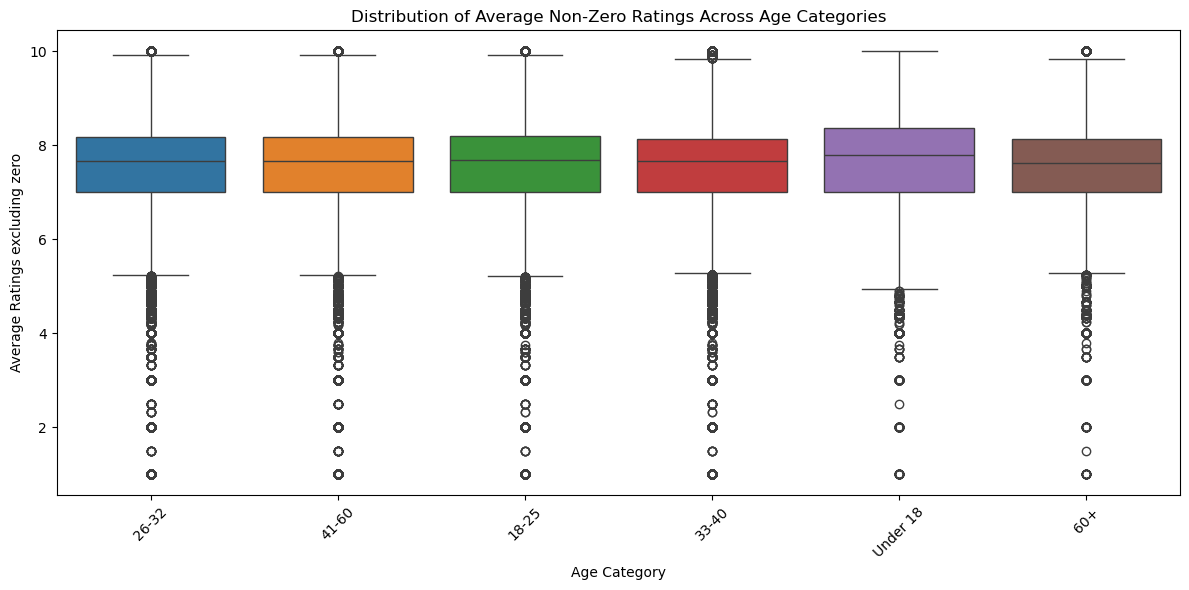

In [14]:
# Box plot for Ratings across Age_Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Category', y='Avg_ratings_excluding_zero', data=df, hue='Age_Category', legend=False)

# Add titles and labels
plt.title('Distribution of Average Non-Zero Ratings Across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Average Ratings excluding zero')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


The box plot illustrates the distribution of average non-zero ratings across different age categories. Key observations include:

1. **Similar Median Ratings**: All age categories have comparable median ratings, which are relatively high, indicating consistent positive feedback across groups.
2. **Interquartile Range (IQR)**: The IQR, representing the middle 50% of ratings, is fairly similar across age groups, suggesting that the spread of ratings is consistent regardless of age.
3. **Outliers**: Each category shows a significant number of outliers on the lower end (ratings below 4), which indicates that some books received notably low ratings despite the overall positive trend.
4. **Age Group Differences**: While the distributions are generally similar, minor variations in the upper and lower whiskers suggest slight differences in rating behavior among age groups.

Overall, the box plot demonstrates that average non-zero ratings are consistently high across all age categories, with a few low-rating outliers in each group.

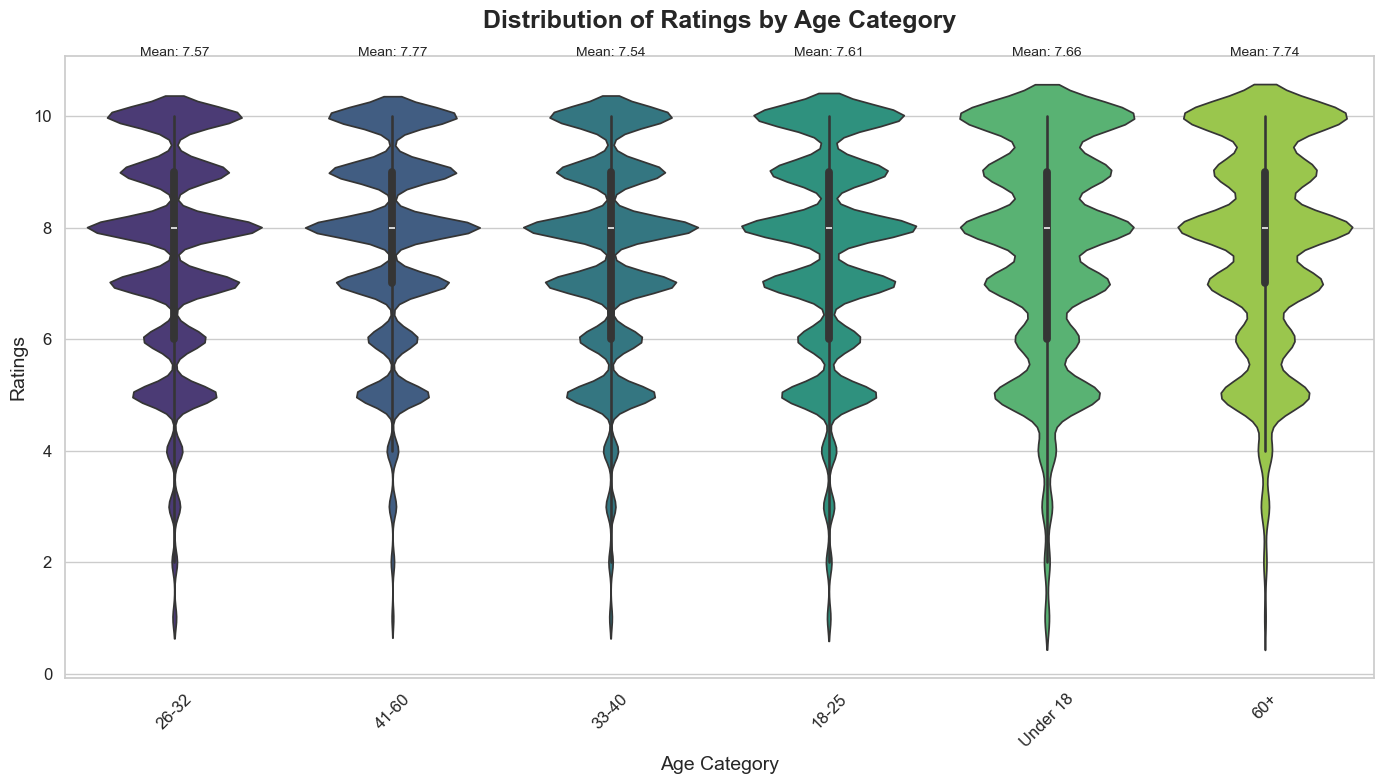

In [15]:
# Filter out zero ratings
df_filtered = df[df['Ratings'] > 0]

# Set the style
sns.set_theme(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Age_Category', y='Ratings', data=df_filtered, hue=None, palette='viridis')

# Customize the plot
plt.title('Distribution of Ratings by Age Category', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


# Add mean ratings for each category
for i, age_cat in enumerate(df_filtered['Age_Category'].unique()):
    mean_rating = df_filtered[df_filtered['Age_Category'] == age_cat]['Ratings'].mean()
    plt.text(i, plt.ylim()[1], f'Mean: {mean_rating:.2f}', horizontalalignment='center', fontsize=10)

# Adjust layout to avoid squeezing
plt.tight_layout()

# Show the plot
plt.show()

#### Key Observations:
1. **Symmetrical Distributions**: Each age category shows a generally symmetrical distribution, indicating consistent rating patterns across groups.
2. **High Concentration**: The majority of ratings are concentrated in the higher range (6–9), reflecting positive feedback across all age groups.
3. **Outliers and Spread**: While the violin plot does not explicitly mark outliers, the elongated tails indicate that lower ratings (below 4) are present in all age groups.
4. **Density Variation**: The density curves reveal subtle differences in how ratings are distributed within each group, with some categories showing slightly wider spreads or peaks.

Overall, the violin plot highlights that average non-zero ratings are predominantly high across all age groups, while also providing insights into the nuances of their distributions.

<a id="publish"></a>
#### Distribution of Average Ratings Across Publication Year Categories

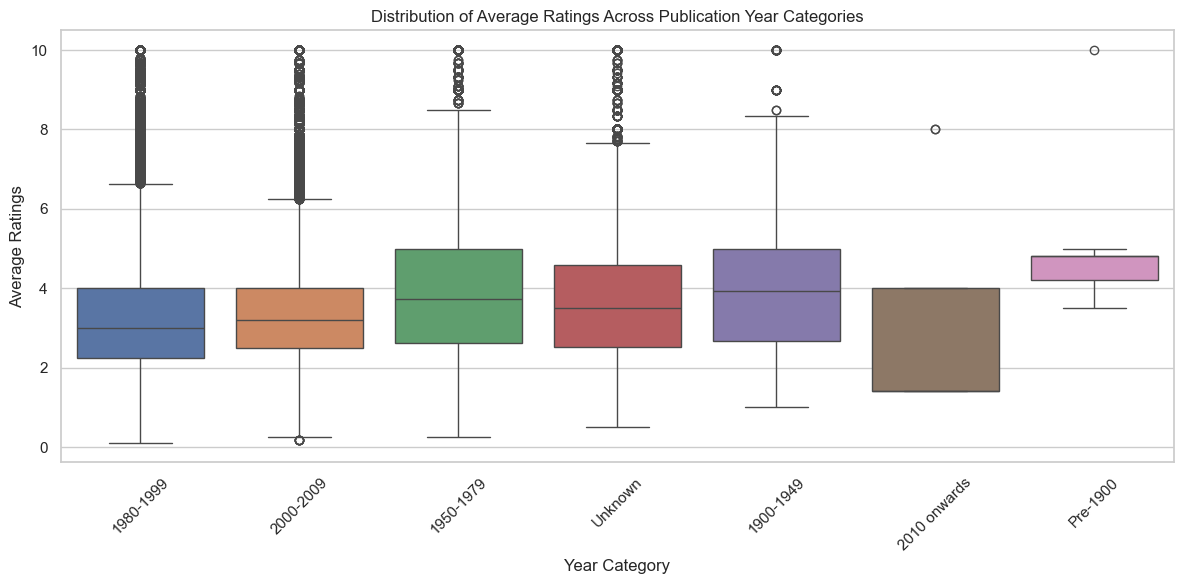

In [16]:
# Box plot for Avg_ratings across Year_Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year_Category', y='Avg_ratings', data=df, hue='Year_Category', legend=False)

# Add titles and labels
plt.title('Distribution of Average Ratings Across Publication Year Categories')
plt.xlabel('Year Category')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

The box plot for the year categories illustrates the distribution of average ratings across different publication periods. Key observations include:

1. **Consistent Median Ratings**: Most year categories have similar median ratings, indicating that books from various periods generally receive comparable average ratings.
2. **Spread of Ratings**: Older publication years (e.g., pre-1900) show a narrower range of ratings, while more recent categories (e.g., 2010 onwards) exhibit a wider spread, suggesting greater variability in ratings for newer books.
3. **Outliers**: All categories contain outliers, with older books and those from unknown years showing notable instances of very low ratings.
4. **Recent Publications**: Books published after 2010 have a broader interquartile range, reflecting a more diverse reception compared to older works.
5. **Pre-1900 Category**: This group has a small sample size but shows high median ratings and minimal variability.

Overall, the plot shows that while average ratings are relatively consistent across publication periods, newer books tend to have more variability in their reception.

<a id="corr"></a>
#### Correlation Heatmap of Book Metrics

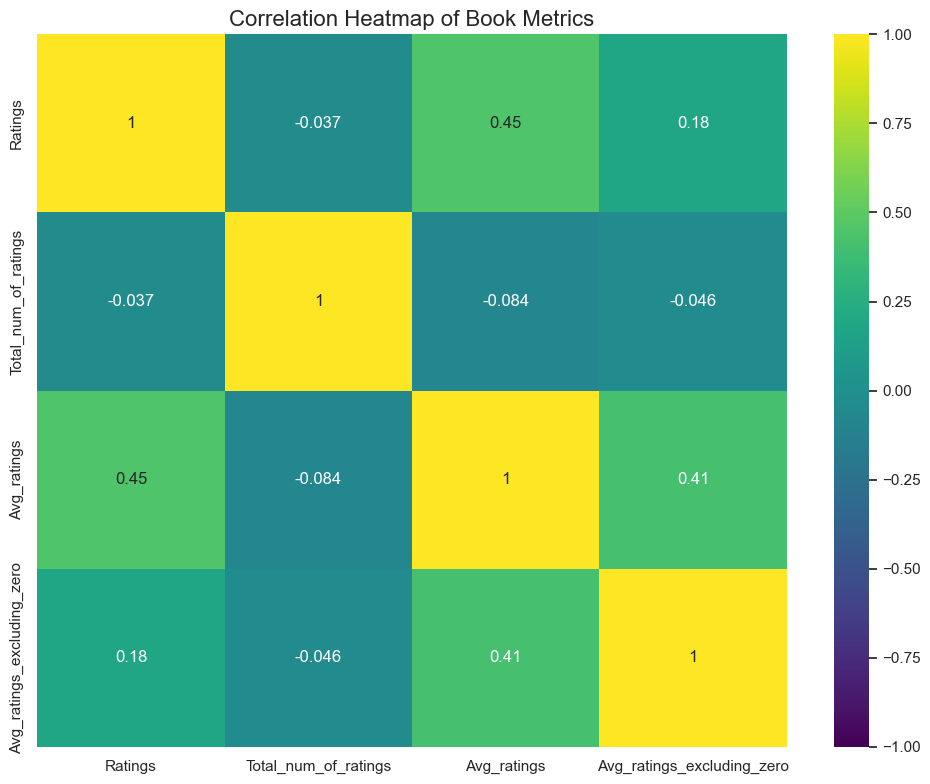

In [17]:
# Select relevant columns
columns = ['Ratings', 'Total_num_of_ratings', 'Avg_ratings', 'Avg_ratings_excluding_zero']

# Create correlation matrix
corr_matrix = df[columns].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Book Metrics', fontsize=16)
plt.tight_layout()
plt.show()

Key observations from the matrix:

- **Ratings and Average Ratings**: A moderate positive correlation (0.45) exists between the number of ratings and the average ratings, suggesting that books with more ratings tend to have slightly higher average ratings.

- **Total Number of Ratings and Average Ratings**: A weak negative correlation (-0.084) indicates that as the total number of ratings increases, average ratings slightly decrease, aligning with the trend observed in the scatter plot.

- **Average Ratings and Average Ratings Excluding Zero**: A strong positive correlation (0.41) shows that the average ratings and those excluding zero closely align, indicating consistency in trends regardless of zero-rating exclusions. thsi makes sense as we removed all the books with just zero rating.

- **Ratings and Average Ratings Excluding Zero**: A weaker positive correlation (0.18) suggests that excluding zero ratings slightly reduces the strength of the relationship between the number of ratings and average ratings.

<a id="encode"></a>
## Encoding Columns
[Back to Table of Contents](#TOC)

In this project, we use **one-hot encoding** to preprocess categorical columns, such as `year_category`, to facilitate hypothesis testing. Categorical data cannot be directly used in statistical tests or machine learning models, as they require numerical inputs. By encoding these categories as binary vectors, we ensure that each category is treated independently without introducing false ordinality. This transformation allows us to analyze relationships between categorical features and the target variable, `review_score`. Specifically, one-hot encoding helps us test our hypothesis by enabling statistical methods to determine whether review scores are influenced by categorical parameters like publication year or other grouped categories.

In [53]:
df.head()

,ISBN,Title,Author,Ratings,Total_num_of_ratings,Avg_ratings,Avg_ratings_excluding_zero,Publisher,Year_Category,Publication_year,User_id,Age_Category,City,State,Country,Image_URL
0,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,0,56,3.89,7.79,Health Communications,1980-1999,1998,8,26-32,timmins,ontario,canada,http://images.amazon.com/images/P/1558746218.0...
1,0002005018,Clara Callan,Richard Bruce Wright,5,14,4.93,7.67,HarperFlamingo Canada,2000-2009,2001,8,26-32,timmins,ontario,canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,0,3,5.00,7.50,HarperPerennial,1980-1999,1991,8,26-32,timmins,ontario,canada,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,0,11,4.27,7.83,Farrar Straus Giroux,1980-1999,1999,8,26-32,timmins,ontario,canada,http://images.amazon.com/images/P/0374157065.0...
4,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,7,3,4.67,7.00,River City Pub,1980-1999,1994,8,26-32,timmins,ontario,canada,http://images.amazon.com/images/P/1881320189.0...


In [62]:
# Drop unnecessary columns
df_copy = df.drop(['Title', 'Author', 'Publisher', 'City', 'State', 'Country', 'Image_URL'], axis=1)

# Encode categorical columns
encoder = OneHotEncoder(sparse_output=False)  # Use sparse=False to get a dense array
encoded_array = encoder.fit_transform(df_copy[['Year_Category', 'Age_Category']])

# Get feature names for encoded columns
encoded_column_names = encoder.get_feature_names_out(['Year_Category', 'Age_Category'])

# Create a DataFrame for encoded columns with proper names
encoded_df = pd.DataFrame(encoded_array, columns=encoded_column_names)

# Drop original categorical columns from df_copy
df_copy = df_copy.drop(['Year_Category', 'Age_Category'], axis=1)

# Add encoded columns back to the dataset
data = pd.concat([df_copy, encoded_df], axis=1)

In [63]:
data.head()

,ISBN,Ratings,Total_num_of_ratings,Avg_ratings,Avg_ratings_excluding_zero,Publication_year,User_id,Year_Category_1900-1949,Year_Category_1950-1979,Year_Category_1980-1999,Year_Category_2000-2009,Year_Category_2010 onwards,Year_Category_Pre-1900,Year_Category_Unknown,Age_Category_18-25,Age_Category_26-32,Age_Category_33-40,Age_Category_41-60,Age_Category_60+,Age_Category_Under 18
0,1558746218,0,56,3.89,7.79,1998,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0002005018,5,14,4.93,7.67,2001,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0060973129,0,3,5.00,7.50,1991,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0374157065,0,11,4.27,7.83,1999,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1881320189,7,3,4.67,7.00,1994,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


We now have a dataset that only have numercial columns, this will be helpful for us to do some Hypothesis testign below and to give us a better idea of how the features are related to the target.

<a id="testing"></a>
## Hypothesis testing
[Back to Table of Contents](#table-of-content)

In this project, we aim to explore the relationships between various features in our dataset and the target variable, `review_score`, as part of our hypothesis testing process. To achieve this, we preprocessed the data using **one-hot encoding** for categorical columns, such as `year_category`, to convert them into a numerical format suitable for statistical analysis. This ensures that each category is treated independently, avoiding any unintended ordinal relationships.

Our hypothesis testing involves the following:

- **Null Hypothesis (H₀)**: Review scores (Ratings) are independent of other parameters (e.g., `Total_num_of_ratings`, `Avg_ratings`, `Publisher`, etc.).
- **Alternative Hypothesis (H₁)**: Review scores are dependent on other parameters.

For **numerical columns**, such as `Total_num_of_ratings` and `Avg_ratings`, we will calculate the **Spearman correlation coefficient** (`spearmanr`) to measure the strength and direction of monotonic relationships with the target variable. We will also compute the corresponding **p-values** to assess the statistical significance of these relationships.

For **categorical columns** that cannot be directly used in correlation analysis, such as `Publisher` or other non-numerical features, we will use the **chi-squared test of independence**. This test evaluates whether there is a significant association between these categorical variables and the target variable, `review_score`.

By combining these approaches, we aim to determine whether review scores are influenced by numerical and categorical parameters, providing deeper insights into the factors that impact book ratings. This analysis will guide further steps in building a robust recommendation system.

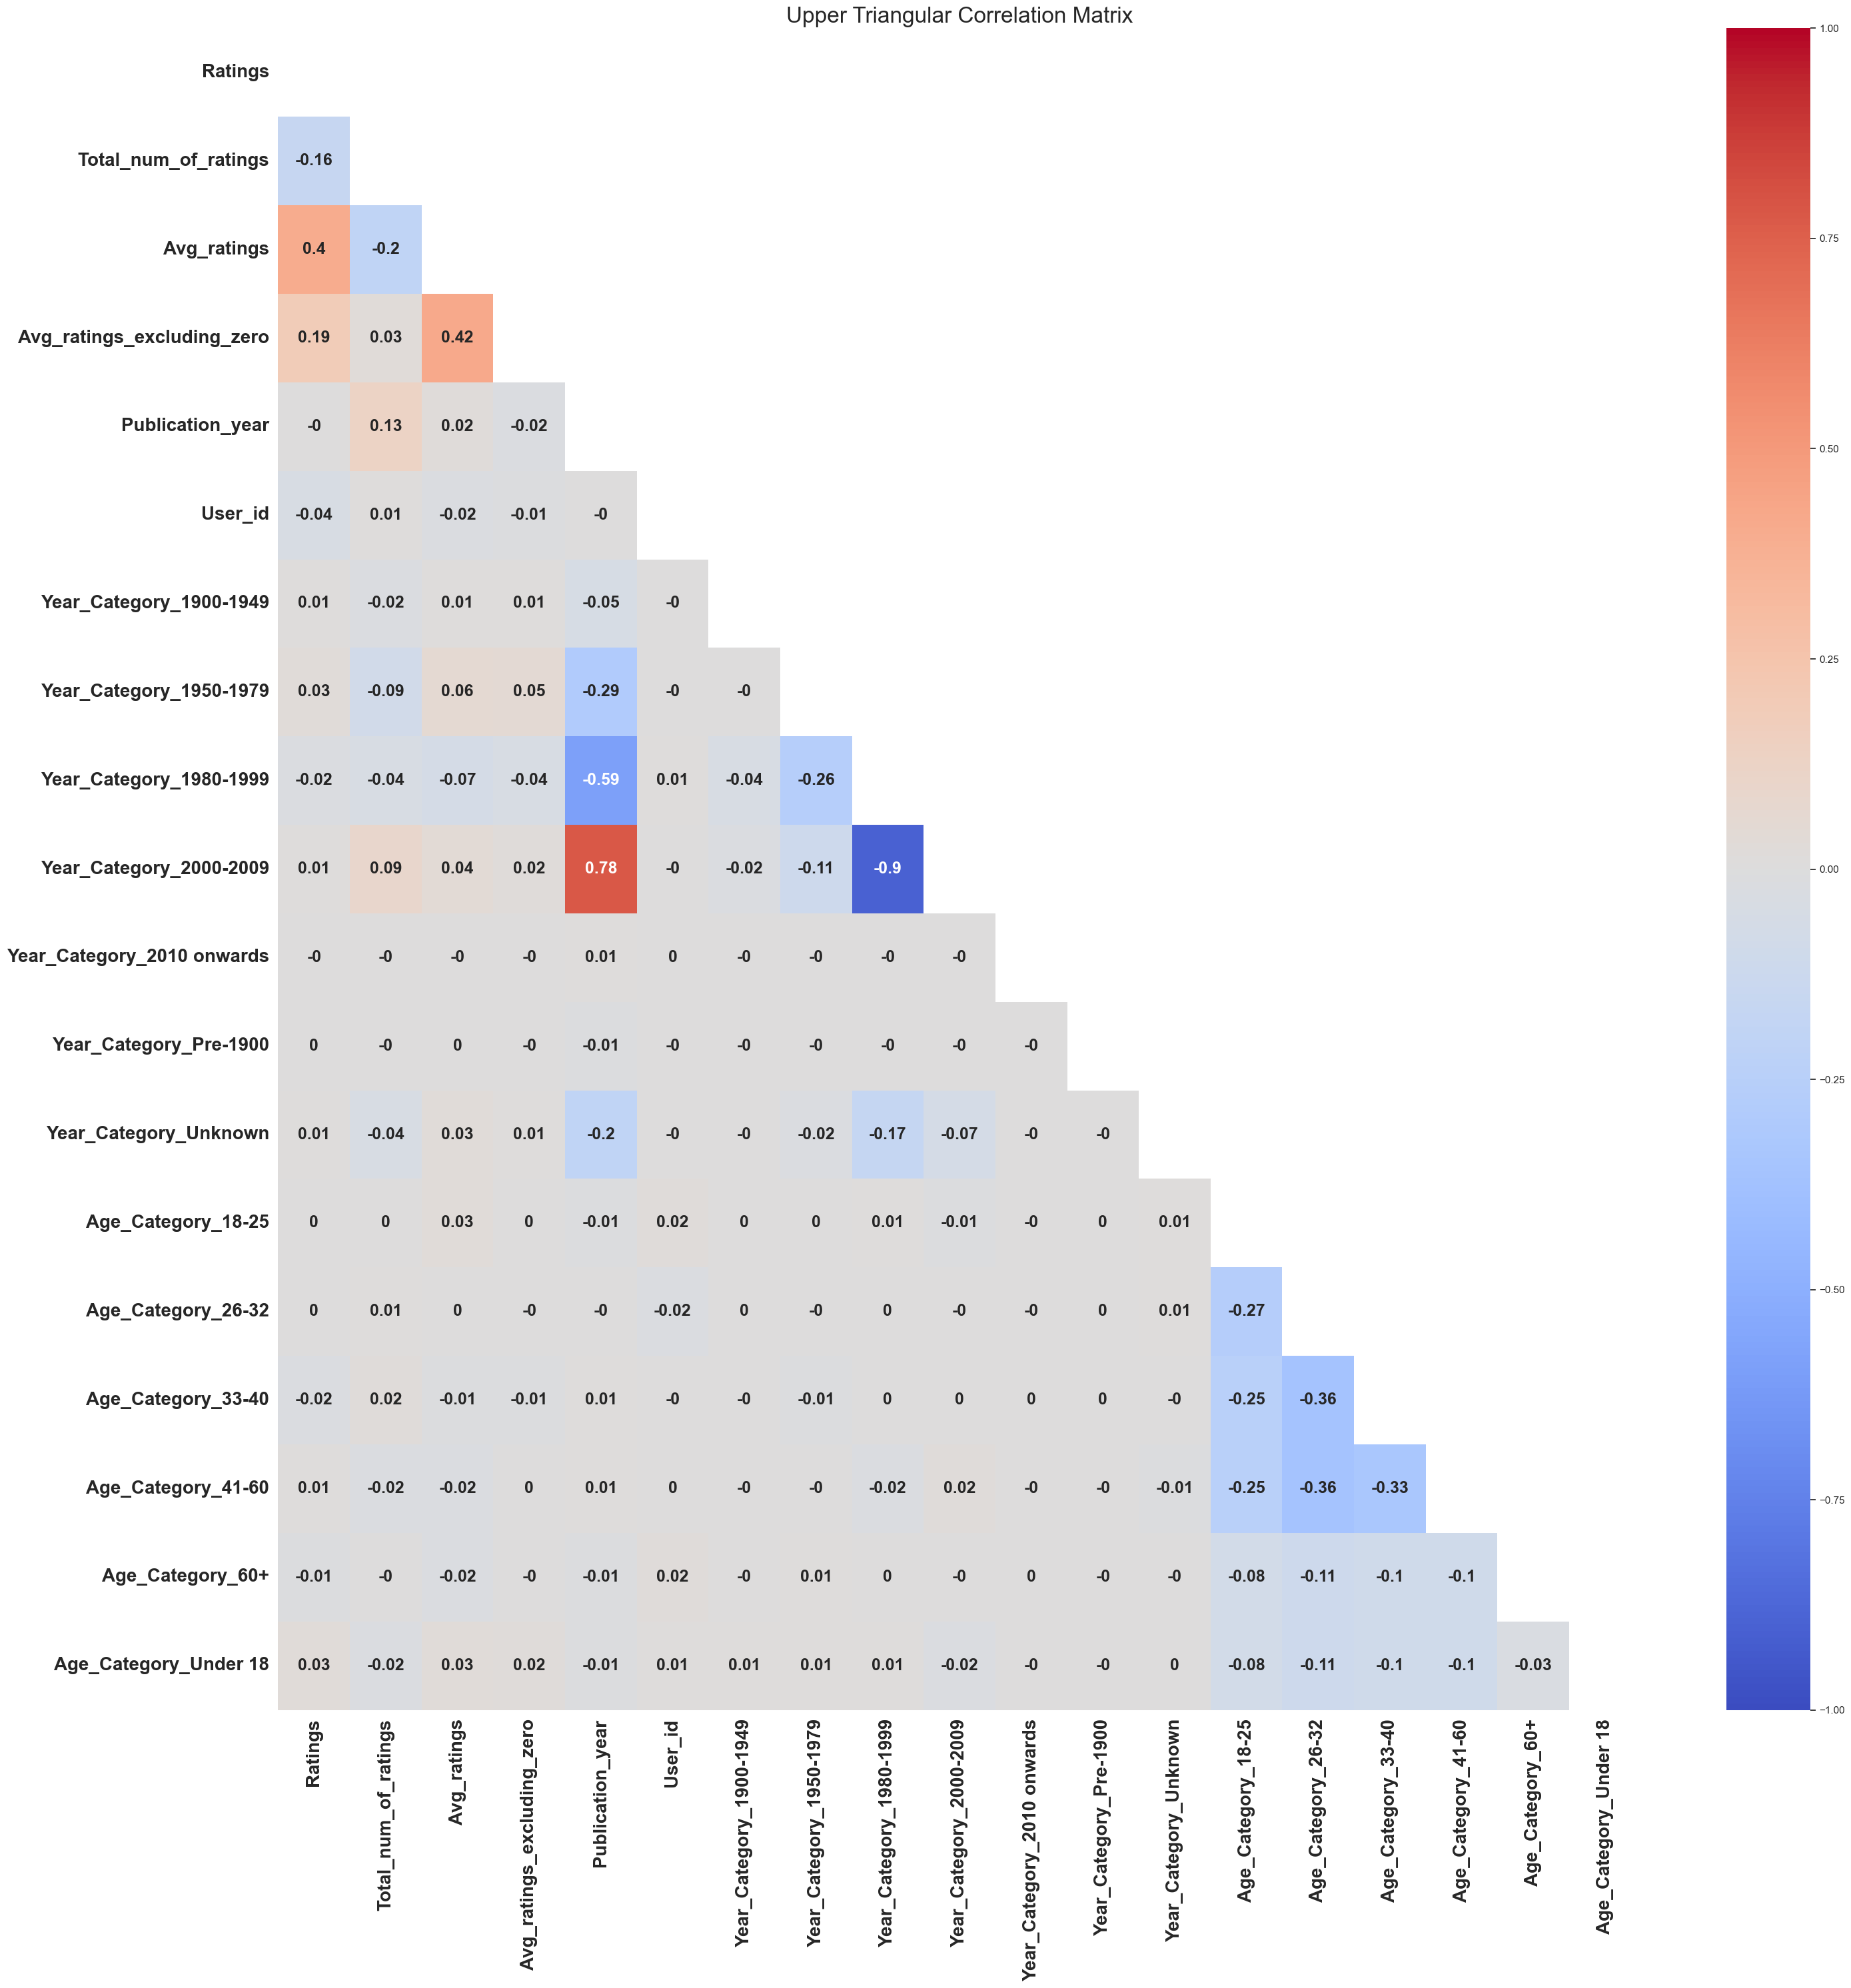

In [81]:
# Select only numerical columns
numerical_features = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix (default is Pearson)
correlation_matrix = numerical_features.corr(method='spearman')

# Plotting the heatmap
plt.figure(figsize=(30, 30), dpi=100)  # Increased figure size
sns.set_style("whitegrid", {'axes.grid': False})  # Remove grid lines
sns.heatmap(correlation_matrix.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', 
            mask=mask, annot_kws={'size': 18, 'weight': 'bold'})  # Increased text size
# Increase axis label font sizes
plt.xticks(fontsize=20, weight='bold', rotation=90)  # Increase x-axis labels' font size and rotate them
plt.yticks(fontsize=20, weight='bold', rotation=0)   # Increase y-axis labels' font size
plt.title("Upper Triangular Correlation Matrix", fontsize=24)  # Increased title size
plt.tight_layout()
plt.show()

In [78]:
# Initialize a dictionary to store results
correlation_results = {}

# Loop through all numerical features except 'Ratings'
for column in numerical_features.columns:
    if column != 'Ratings':
        # Calculate Pearson correlation and p-value
        corr, p_value = spearmanr(data['Ratings'], data[column])
        correlation_results[column] = {'Correlation': corr, 'P-Value': p_value}

# Convert results to a DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_results).T

# Print results
print(correlation_df)

                            Correlation        P-Value
Total_num_of_ratings          -0.155918   0.000000e+00
Avg_ratings                    0.397608   0.000000e+00
Avg_ratings_excluding_zero     0.190728   0.000000e+00
Publication_year              -0.002957   6.351536e-03
User_id                       -0.037863  1.248494e-267
Year_Category_1900-1949        0.006401   3.498644e-09
Year_Category_1950-1979        0.031088  4.580152e-181
Year_Category_1980-1999       -0.023386  2.627456e-103
Year_Category_2000-2009        0.008747   6.936826e-16
Year_Category_2010 onwards    -0.000076   9.439310e-01
Year_Category_Pre-1900         0.001294   2.322736e-01
Year_Category_Unknown          0.012724   7.740555e-32
Age_Category_18-25             0.003509   1.204399e-03
Age_Category_26-32             0.000649   5.495526e-01
Age_Category_33-40            -0.018040   3.139028e-62
Age_Category_41-60             0.005242   1.318719e-06
Age_Category_60+              -0.009622   6.713612e-19
Age_Catego

#### Spearman Correlation Analysis 

We conducted **Spearman's correlation** to evaluate the relationships between features and the target variable, `Ratings`. Spearman's correlation is appropriate for this dataset due to its ability to handle skewed data and monotonic (non-linear) relationships. Statistical significance was determined using **p-values**, with a threshold of **0.05** to decide whether to reject the null hypothesis (**H₀**: no relationship exists).

##### Key Results:

| Feature                        | Correlation | P-Value          | Significance |
|--------------------------------|-------------|------------------|--------------|
| **Total_num_of_ratings**       | -0.1559     | 0.0000           | Significant  |
| **Avg_ratings**                | 0.3976      | 0.0000           | Significant  |
| **Avg_ratings_excluding_zero** | 0.1907      | 0.0000           | Significant  |
| **Publication_year**           | -0.0029     | 0.0064           | Significant  |
| **Year_Category_2010 onwards** | -0.0001     | 0.9439           | Not Significant |
| **Age_Category_26-32**         | 0.0006      | 0.5495           | Not Significant |

##### Observations:
1. **Numerical Features**:
   - `Avg_ratings` has the strongest positive correlation (0.3976), indicating that books with higher average ratings tend to have higher review scores.
   - `Avg_ratings_excluding_zero` also shows a weak positive correlation (0.1907), suggesting a similar trend.
   - `Total_num_of_ratings` exhibits a weak negative correlation (-0.1559), meaning books with more ratings may not necessarily have higher review scores.
   - `Publication_year` has a very weak negative correlation (-0.0029), but it is statistically significant, suggesting a minor relationship between publication year and review scores.

2. **Categorical Features (`Year_Category` and `Age_Category`)**:
   - Most year categories show weak but statistically significant correlations with `Ratings`. However, "2010 onwards" and "Pre-1900" are not statistically significant, indicating no meaningful relationship with review scores.
   - Similarly, most age categories show weak correlations, but "26–32" is not statistically significant (p = 0.5495), suggesting no relationship with review scores for this group.


##### Conclusion:
The analysis reveals that key features like `Avg_ratings`, `Avg_ratings_excluding_zero`, and `Total_num_of_ratings` have statistically significant relationships with review scores, allowing us to reject the null hypothesis (H₀) for these variables. Categorical features like year and age categories show weaker but often significant relationships, except for a few cases (e.g., "2010 onwards" and "26–32"). These insights confirm that review scores are influenced by both numerical and categorical parameters, providing valuable guidance for building a recommendation system tailored to user preferences and book attributes!

Now, let's also do a Chi-Square Test for the non-numeric columns

In [76]:
# Identify categorical columns (excluding Ratings)
categorical_columns = ['Publisher', 'Year_Category', 'Age_Category', 'City', 'State', 'Country', 'Title', 'Author']

# Initialize a dictionary to store results
chi_square_results = {}

# Loop through each categorical column
for col in categorical_columns:
    # Create a contingency table for Ratings and the current column
    contingency_table = pd.crosstab(df['Ratings'], df[col])
    
    # Perform Chi-Square Test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store results
    chi_square_results[col] = {'Chi-Square Statistic': chi2, 'P-Value': p_value, 'Degrees of Freedom': dof}

# Convert results to a DataFrame for better visualization
chi_square_df = pd.DataFrame(chi_square_results).T

# Print results
print(chi_square_df)

               Chi-Square Statistic  P-Value  Degrees of Freedom
Publisher              2.865993e+05      0.0            115720.0
Year_Category          2.815557e+03      0.0                60.0
Age_Category           3.049193e+03      0.0                50.0
City                   5.062891e+05      0.0            142120.0
State                  9.669428e+04      0.0             18590.0
Country                2.604930e+04      0.0              3870.0
Title                  2.152075e+06      0.0           1355620.0
Author                 1.166984e+06      0.0            621090.0


#### Chi-Square Test Results

The Chi-Square test was conducted to evaluate the association between categorical features and the target variable, `Ratings`. This test helps determine whether the observed distribution of ratings is dependent on the categories of each feature. A **p-value** less than **0.05** indicates statistical significance, meaning we reject the null hypothesis (**H₀**: no association exists) and conclude that the feature is related to `Ratings`.

##### Key Results:

| Feature         | Chi-Square Statistic | P-Value | Degrees of Freedom | Significance |
|------------------|-----------------------|---------|--------------------|--------------|
| **Publisher**    | 2.865993e+05         | 0.0     | 115720.0           | Significant  |
| **Year_Category**| 2.815557e+03         | 0.0     | 60.0               | Significant  |
| **Age_Category** | 3.049193e+03         | 0.0     | 50.0               | Significant  |
| **City**         | 5.062891e+05         | 0.0     | 142120.0           | Significant  |
| **State**        | 9.669428e+04         | 0.0     | 18590.0            | Significant  |
| **Country**      | 2.604930e+04         | 0.0     | 3870.0             | Significant  |
| **Title**        | 2.152075e+06         | 0.0     | 1355620.0          | Significant  |
| **Author**       | 1.166984e+06         | 0.0     | 621090.0           | Significant  |

##### Observations:
1. **P-Values**:
   - All features have a p-value of **0**, indicating that the associations between these categorical features and `Ratings` are statistically significant.
   - We reject the null hypothesis (**H₀**) for all features.

2. **Chi-Square Statistics**:
   - Features like `Title` and `Author` have extremely high Chi-Square statistics due to their large number of unique values, suggesting strong associations with `Ratings`.
   - Features like `Publisher`, `City`, and `State` also show high Chi-Square statistics, indicating meaningful relationships with review scores.

3. **Degrees of Freedom (DoF)**:
   - Features with more unique values (e.g., `Title`, `Author`, `City`) have higher degrees of freedom, reflecting the complexity of their associations with `Ratings`.

##### Conclusion:
The Chi-Square test results confirm that all categorical features in the dataset are significantly associated with `Ratings`. This suggests that factors such as publisher, year category, age group, location (city/state/country), book title, and author influence review scores in meaningful ways. These insights will guide feature selection and further analysis in building a recommendation system tailored to user preferences and book attributes!

Our hypothesis tests show that most features in the dataset are statistically significant with respect to the target variable, Ratings. However, to understand their relative importance and contributions, we need to evaluate them further using complex models. These models will help identify key features, eliminate redundant ones, and assign appropriate weights to each feature, ultimately enhancing the accuracy and efficiency of our recommendation system.

<a id="testing"></a>
## Conclusion and Next Steps
[Back to Table of Contents](#table-of-content)

In this notebook, we explored the dataset through visualizations and statistical analyses to better understand its characteristics. Key observations include:

1. **Ratings Distribution**: Data with `0 ratings` is skewed toward lower numbers, while non-zero ratings are skewed toward higher values.
2. **Geographic Representation**: The United States has the highest number of users, followed by Canada, which accounts for less than one-third of the U.S. representation.
3. **Age Distribution**: The dataset contains very few users under 18 and over 60, which aligns with expectations but may not be entirely reliable due to previous data cleaning steps that removed extreme values.
4. **Publication Year Trends**: Older publication years (e.g., pre-1900) show a narrower range of ratings, while recent years (e.g., 2010 onwards) exhibit greater variability in ratings.
5. **Age Category Ratings**: Ratings across different age categories are relatively similar, showing no significant differences.

In the hypothesis testing phase, we found that most features are **statistically significant**, indicating that `Ratings` depend on these features. 

### Next Steps
For the next phase, we will:
1. **Text Processing**: Convert text data (e.g., `Title` and `Author`) using **NLP techniques** to extract meaningful features.
2. **Baseline Model**: Build a baseline model using simple algorithms like **logistic regression** to evaluate feature importance.
3. **Recommendation System**: Implement basic recommendation approaches, such as **popularity-based filtering** and **content-based filtering**, to create an initial model for suggesting books.

This foundational work will pave the way for developing a more sophisticated recommendation system in later stages.